<a href="https://colab.research.google.com/github/aniusoro/Uni/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

In [ ]:
sexdata = read.csv("sexSells.csv")
sorted = sexdata[order(sexdata$Image,sexdata$Subject), ]
sorted


,Subject,AdRecall,Image
,<int>,<int>,<chr>
13,1,2,NotSexy
20,2,7,NotSexy
9,3,1,NotSexy
36,4,5,NotSexy
67,5,0,NotSexy
47,6,3,NotSexy
61,7,5,NotSexy
26,8,4,NotSexy
75,9,7,NotSexy


Question 2:


In [ ]:
library(ggplot2)
install.packages("plyr")
library(plyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [ ]:
q2M = mean(sorted[c(40:78), c(2)])  - mean(sorted[c(1:39), c(2)]) 
q2SD = sd((sorted[c(40:78), c(2)]) - (sorted[c(1:39), c(2)]))
q2SE = q2SD / sqrt(39)


# Test statistic
q2T = (q2M - 0) / q2SE
round(q2T, 3)

# degrees of freedom 
q2df = 39 - 1
q2df

alpha = 0.05

# tcrit
q2tcrit = qt(alpha, df = q2df)

# p value
q2pval = pt(q2T, df = q2df)
round(q2pval, 3)

# we fail to reject the null hypothesis since pval is greater than alpha.



[1] 0.859

[1] 38

[1] 0.802

Question 3:


In [ ]:
sexy_z = (((sorted[c(1:39), c(2)]) - (mean(sorted[c(1:39), c(2)]))) / sd(sorted[c(1:39), c(2)]))
notsexy_z = (((sorted[c(40:78), c(2)]) - (mean(sorted[c(40:78), c(2)]))) / sd(sorted[c(40:78), c(2)]))

q3R = round((sum(sexy_z * notsexy_z) / 38), 3)
q3R




[1] 0.525

Question 4:

In [ ]:
q4n = length((sorted[c(1:39), c(2)]))
SRM = q2SD / sqrt(2*(1-q3R))

M_diff = (mean(sorted[c(40:78), c(2)])) - (mean(sorted[c(1:39), c(2)]))
q4d = M_diff/SRM
#Hedge's g

q4g = q4d * (1 - 3/(4 * (q4n - 1) - 1))
round(q4g, 3)

# this means the two groups do not really differ due to teh small effect size


[1] 0.131

Question 5:

In [ ]:
# the dependent variable is the recall score and the independent variable is the image

Question 6:

In [ ]:
Subject = 1:39
AdRecall = (sorted[c(40:78), c(2)]) - (sorted[c(1:39), c(2)]) 
Image = rep("Difference", 39)
diffscores = data.frame(Subject, AdRecall, Image)
new_data = rbind(sorted, diffscores)

plotData <- ddply(new_data, c("Image"), summarise,
                  n = length(AdRecall),
                  Mean = mean(AdRecall),
                  df = 38,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = 38),
                  se = sd(AdRecall) / sqrt(39),
                  MOE = se * t_crit,
                  CI_bottom = Mean - MOE,
                  CI_top = Mean + MOE
)

plotData


Image,n,Mean,df,alpha,t_crit,se,MOE,CI_bottom,CI_top
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Difference,39,0.2307692,38,0.05,-2.024394,0.2686035,-0.5437593,0.7745285,-0.3129901
NotSexy,39,3.5384615,38,0.05,-2.024394,0.2670531,-0.5406207,4.0790822,2.9978408
Sexy,39,3.7692308,38,0.05,-2.024394,0.2832755,-0.5734612,4.3426920,3.1957696


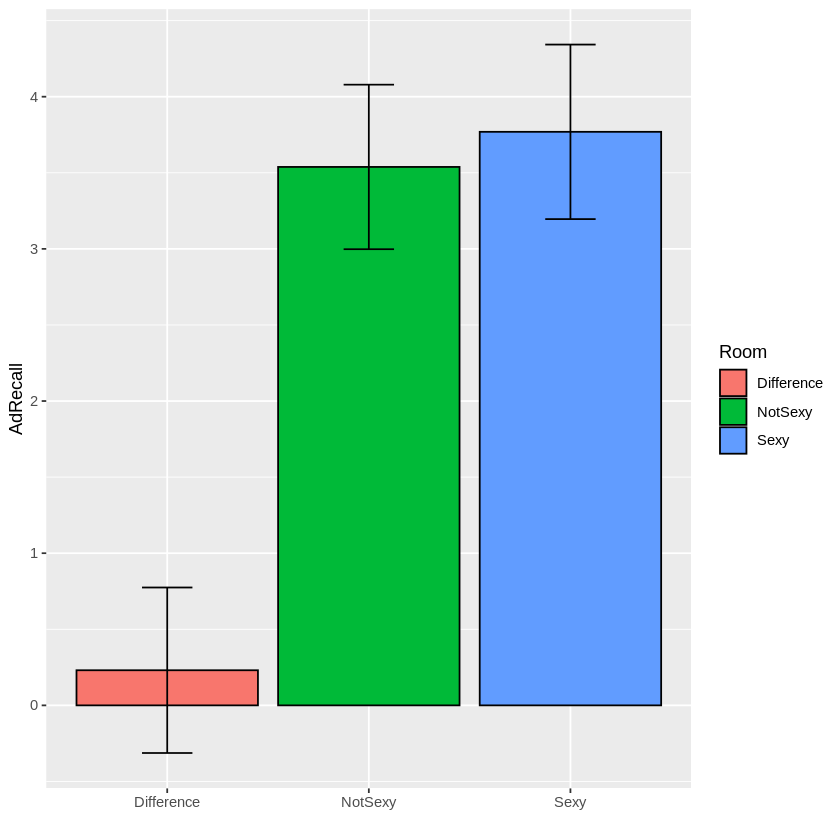

In [ ]:
ggplot(plotData, aes(x = Image, y = Mean)) +
  geom_bar(stat = "identity", colour = "black", aes(fill = Image)) +
  geom_errorbar(aes(ymin = CI_bottom,
                    ymax = CI_top),
                    width = 0.25
                    ) +
  xlab("") + ylab("AdRecall") +
  labs(fill = "Room")

Question 7:

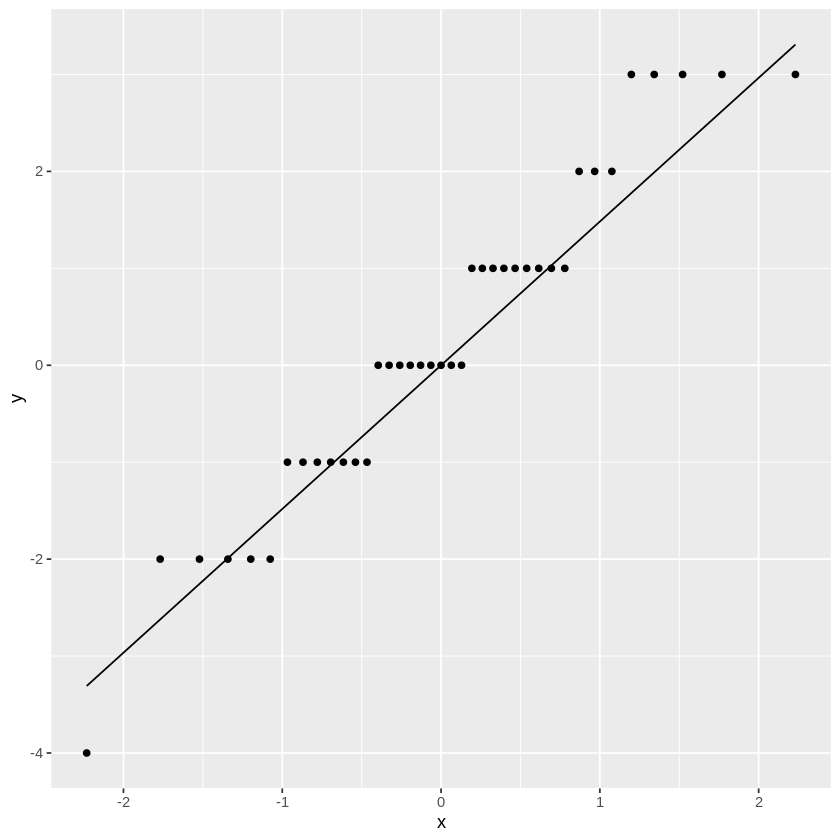

In [ ]:
ggplot(diffscores, aes(sample = AdRecall)) +
  stat_qq() +
  stat_qq_line()

  # i think it is strange because it is a dependent test and so theres gonna be very small difference values.

Question 8:


In [ ]:
install.packages("WRS2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘reshape’, ‘mc2d’




In [ ]:
library(WRS2)

q8M = mean(sorted[c(40:78), c(2)], trim = 0.2)  - mean(sorted[c(1:39), c(2)], tr = 0.2) 
q8SD = sqrt((winvar((sorted[c(40:78), c(2)]), tr=0.2))) - sqrt((winvar((sorted[c(1:39), c(2)]), tr=0.2)))
q8SE = q8SD / ((1 - 2 * 0.2) *sqrt(39))

# Test statistic
q8T = (q8M - 0) / q2SE
round(q8T, 3)

# degrees of freedom 
q8df = 39 - 1
q8df

alpha = 0.05

# tcrit
q8tcrit = qt(alpha, df = q8df)

# p value
q8pval = pt(q8T, df = q8df)
round(q8pval, 3)

# # we fail to reject the null hypothesis since pval is greater than alpha.

[1] 0.447

[1] 38

[1] 0.671

Question 9:


In [ ]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

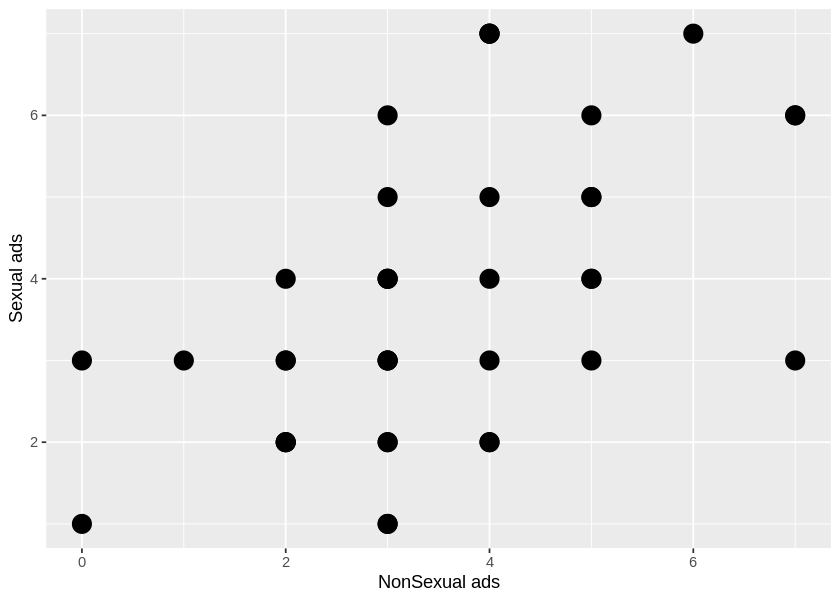

In [ ]:
x = sorted[c(1:39), c(2)]
y = sorted[c(40:78), c(2)]
ggplot(diffscores,aes(x, y))+
xlab("NonSexual ads") + ylab("Sexual ads")+
  geom_point(size = 5)

Question 10:


In [ ]:
# slope
q10slope = q3R*(sd(sorted[c(40:78), c(2)]) / sd(sorted[c(1:39), c(2)]))
round(q10slope, 3)


# intercept
q10intercept = mean(sorted[c(40:78), c(2)]) - q10slope * mean(sorted[c(1:39), c(2)])
round(q10intercept, 3)

# y = 1.799 + 0.557x


[1] 0.557

[1] 1.799

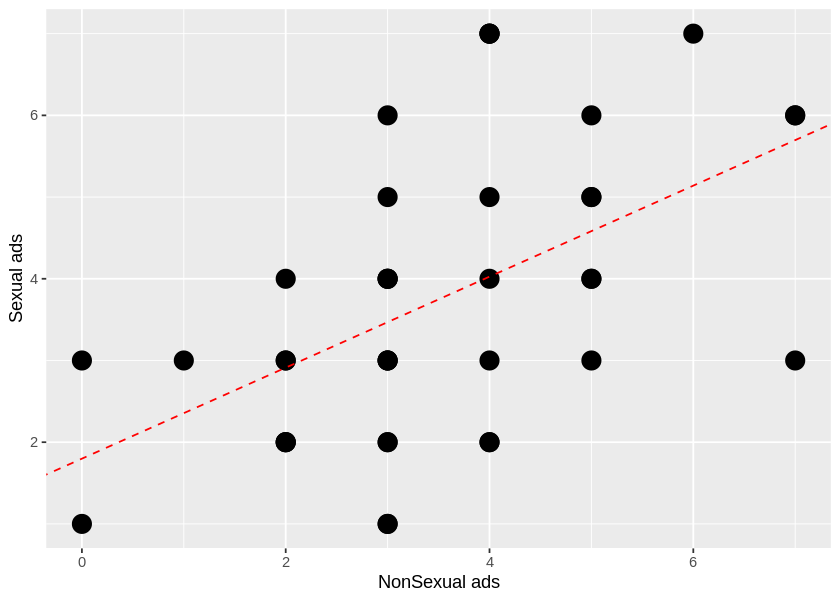

In [ ]:
x = sorted[c(1:39), c(2)]
y = sorted[c(40:78), c(2)]
ggplot(diffscores,aes(x, y))+
xlab("NonSexual ads") + ylab("Sexual ads")+
  geom_point(size = 5) +
  geom_abline(intercept = q10intercept,
              slope = q10slope,
              colour = "red",
              linetype = "dashed")

Question 11:


In [ ]:
icecreamdata = read.csv("IceCreamData.csv")

# Means
temp_M = mean(icecreamdata$Temperature)
revenue_M = mean(icecreamdata$Revenue)


# SD
temp_SD = sd(icecreamdata$Temperature)
revenue_SD = sd(icecreamdata$Revenue)

temp_Z = (icecreamdata$Temperature - temp_M) / temp_SD
revenue_Z = (icecreamdata$Revenue - revenue_M) / revenue_SD
q11R = sum(temp_Z * revenue_Z)/(nrow(icecreamdata) - 1)

# R
q11R

# slope
q11slope = q11R *(revenue_SD/temp_SD)
round(q11slope, 3)


# intercept
q11intercept = revenue_M - q11slope * temp_M
round(q11intercept, 3)

# y = 21.444 + 44.831x

[1] 0.9898016

[1] 21.444

[1] 44.831

Question 12:

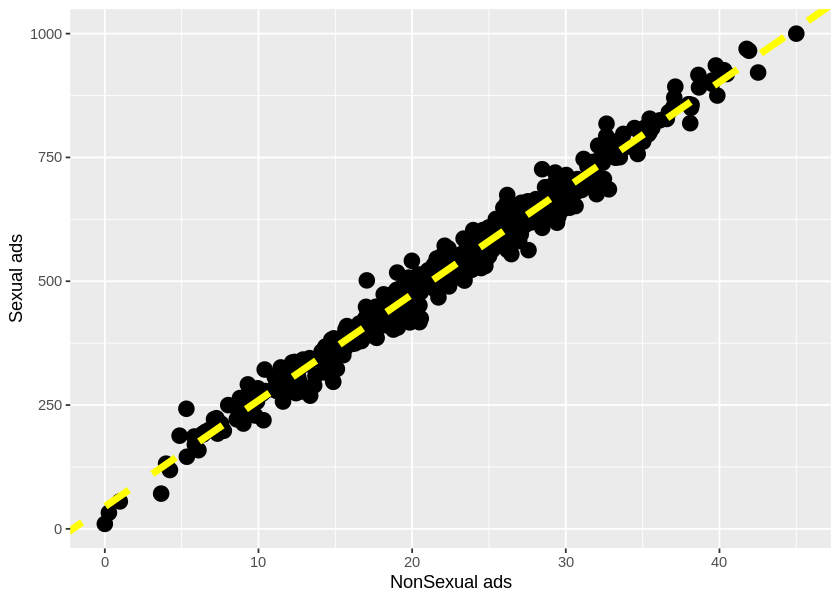

In [ ]:
x = icecreamdata$Temperature
y = icecreamdata$Revenue
ggplot(icecreamdata,aes(x, y))+
xlab("NonSexual ads") + ylab("Sexual ads")+
  geom_point(size = 4) +
  geom_abline(intercept = q11intercept,
              slope = q11slope,
              colour = "yellow", size = 2,
              linetype = "dashed"
              )

Question 13:


In [ ]:
# linear model
# y = 21.444 + 44.831x

suncream = 21.444 + (44.831 * 4726.85)
round(suncream, 3)

# the predicted revenue will be $211930.85635
#that's crazy cash but too bad I'd be dead in 5 billion years


[1] 211930.9

Question 14:

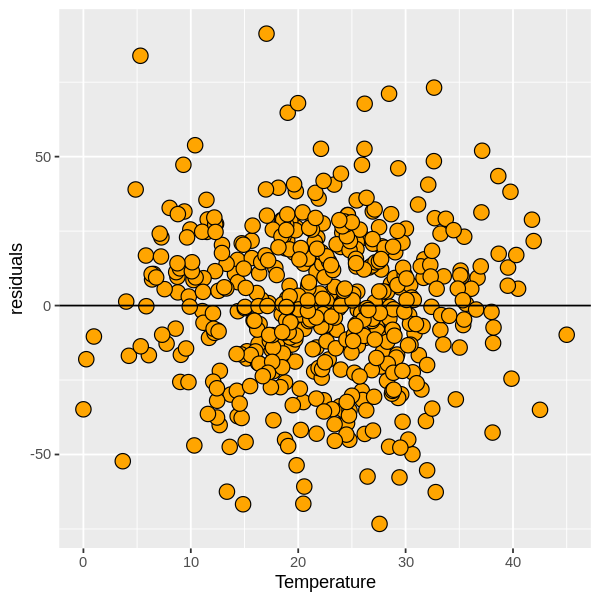

In [ ]:
#Y-hat values
icecreamdata$predictions = q11intercept + (q11slope * icecreamdata$Temperature)


#residuals
icecreamdata$residuals = icecreamdata$Revenue - icecreamdata$predictions
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(icecreamdata, aes(x = Temperature, y = residuals)) +
  geom_point(shape = 21, colour = "black", fill = "orange",
              stroke = 0.5, size = 4) +
  geom_hline(yintercept = 0)

Question 15:

In [ ]:
# yes it is reasonable to assume that it is normally distributed due to the allocation of dots on either side of the intercept

Question 16:

In [ ]:
n = nrow(icecreamdata)
S2_resid = sum(icecreamdata$residuals ^ 2)/(n-2)
S2_y = sum(icecreamdata$residuals ^ 2)/(n-1)

# accounted for -0.002 of the variation
1 - (S2_resid/S2_y)

[1] -0.002008032

Question 17:


In [ ]:
# Sum of Squared Deviations of X
SS_x = sum((icecreamdata$Temperature - mean(icecreamdata$Temperature))^2)


# SE of the slope
SE_slope = sqrt(S2_resid / SS_x)
round(SE_slope, 3)

# SE of the intercept
SE_intercept = sqrt((S2_resid * sum(icecreamdata$Temperature^2)) / (n * SS_x))
round(SE_intercept, 3)

[1] 0.138

[1] 3.272

Question 18:


In [ ]:

P = 1
q18df = n - P - 1
cat("df is",q18df)

df is 498

In [ ]:
alpha = 0.05

# CRITICAL T
#Lower Bound
q18lower = qt(0.05/2, df = q18df)

#Upper Bound
q18upper = qt(0.05/2, df = q18df, lower.tail = FALSE)

# 95% CI on slope
q18lower = q11slope + (q18lower * SE_slope)
q18upper = q11slope + (q18upper* SE_slope)
round(q18lower, 3)
round(q18upper, 3)
# T
q18T = (q11slope - 0)/SE_slope
round(q18T, 3)

#pval
q18pval = pt(q18T, df = q18df, lower.tail = FALSE) * 2
round(q18pval, 3)

[1] 21.172

[1] 21.715

[1] 155.057

[1] 0